In [1]:
#import dependencies
import requests
import json
from config1 import key
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import seaborn as sns

In [13]:
def news_api_data(user_input):
    '''takes an argument "user_input" as keywords to perform API calls to newsapi.org,
    returns a DataFrame with news data
    ''' 
   
    #in case we have several words as user's input, we can mark words or phrases that must appear with a + symbol
    user_input_list=user_input.split(" ")
    user_input_plus="".join(f'+{k}' for k in user_input_list)
    print(user_input_plus)

    url="https://newsapi.org/v2/everything"
    
    #specify parameters for sample, i.e results come from the particular news  resources
    sparams={
       'apiKey': key,
       'q': user_input_plus,
       'language': 'en',
       'pageSize': 100,
       'from': '2017-06-01',
       'sortBy': 'publishedAt',
       'sources': 'abc-news, associated-press, bbc-news, breitbart-news, cbc-news, cbs-news, cnn,  fox-news, daily-mail, independent, nbc-news, newsweek, new-york-magazine, reuters, time, the-globe-and-mail, the-telegraph, the-washington-times, usa-today'
    }
       
    #make API request and retrieve totalResults value 
    responses=requests.get(url, params=sparams)
    
    st_code=responses.status_code   
    if st_code!=200: 
        print(f'API problem, code {responses.status_code}')
    
    news_info=responses.json()
    sample_total=news_info['totalResults']
    
    #if response containes more than 10000 articles, retrive information for 10000.
    #Otherwise API returns an error 419 - too many requests 
    if sample_total>10000:
        sample_total=10000
    print(f'The total number of results is {sample_total}')
   
    #calculate the nuber of pages to iterate through (numer of all results is diveded by 100 (i.e. records per page))
    x=math.ceil(sample_total/100)
    print(f'The number of pages is {x}')
    
    #create DataFrame for retrieved results
    news_data=pd.DataFrame(columns=["published_at","name", "author", "description", "url","year_month"])
    index=0

    #iterate through each page and store  results in the DataFrame
    for page in range(1,x+1):
        sparams['page']=page
        responses=requests.get(url, params=sparams)    
        news_info=responses.json()
        print(f'processing page {page} of {x}')
        if 'articles' not in news_info:
            print(f'skipping page {page} of {x}')
            continue
        for article in news_info['articles']:
            news_data.loc[index,"published_at"]=article["publishedAt"]
            news_data.loc[index,"name"]=article["source"]["name"]
            news_data.loc[index,"author"]=article["author"]
            news_data.loc[index,"description"]=article["description"]
            news_data.loc[index,"url"]=article["url"]
            news_data.loc[index,"year_month"]=article["publishedAt"][:7]
            index+=1
    
    #clean the data from duplicate records 
    news_data.drop_duplicates(subset=['published_at','name','description'], keep='first', inplace=True)
    news_data.head(20)
    news_data.to_csv("report.csv")
    news_data.info()
    return news_data              

In [18]:
news_dat=news_api_data('spacex')
news_dat.head(10)

+spacex
The total number of results is 1973
the number of pages is 20
processing page 1 of 20
processing page 2 of 20
processing page 3 of 20
processing page 4 of 20
processing page 5 of 20
processing page 6 of 20
processing page 7 of 20
processing page 8 of 20
processing page 9 of 20
processing page 10 of 20
processing page 11 of 20
processing page 12 of 20
processing page 13 of 20
processing page 14 of 20
processing page 15 of 20
processing page 16 of 20
processing page 17 of 20
processing page 18 of 20
processing page 19 of 20
processing page 20 of 20
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 1972
Data columns (total 6 columns):
published_at    1961 non-null object
name            1961 non-null object
author          1890 non-null object
description     1957 non-null object
url             1961 non-null object
year_month      1961 non-null object
dtypes: object(6)
memory usage: 107.2+ KB


,published_at,name,author,description,url,year_month
0,2018-06-30T15:45:21Z,Daily Mail,http://www.dailymail.co.uk/home/search.html?s=...,Access to the Greco-Roman ruins in the village...,http://www.dailymail.co.uk/news/article-590409...,2018-06
1,2018-06-29T21:27:33Z,Fox News,Bill Mears,Fox News Tart Texas talker gets serious consid...,http://www.foxnews.com/politics/2018/06/29/tar...,2018-06
2,2018-06-29T17:56:00Z,Independent,"Anthony Cuthbertson, Anthony Cuthbertson",Weather conditions create luminous plume effec...,https://www.independent.co.uk/life-style/gadge...,2018-06
3,2018-06-29T14:44:27Z,Daily Mail,http://www.dailymail.co.uk/home/search.html?s=...,A ball-shaped artificial intelligence robot ni...,http://www.dailymail.co.uk/wires/afp/article-5...,2018-06
4,2018-06-29T13:42:34Z,The Telegraph,Jeremy Taylor,None,https://www.telegraph.co.uk/travel/destination...,2018-06
5,2018-06-29T13:17:05Z,Daily Mail,http://www.dailymail.co.uk/home/search.html?s=...,The rocket lifted off from Nasa's Kennedy Spa...,http://www.dailymail.co.uk/sciencetech/article...,2018-06
6,2018-06-29T13:14:47Z,Daily Mail,,"SpaceX launches Falcon 9 rockets, the last of ...",http://www.dailymail.co.uk/video/sciencetech/v...,2018-06
7,2018-06-29T12:42:05Z,USA Today,"USA TODAY, James Dean, USA TODAY",SpaceX launched its Falcon 9 rocket and Dragon...,https://www.usatoday.com/story/tech/nation-now...,2018-06
8,2018-06-29T12:00:00Z,Daily Mail,http://www.dailymail.co.uk/home/search.html?s=...,A former astronaut helped arrange the delivery...,http://www.dailymail.co.uk/wires/pa/article-59...,2018-06
9,2018-06-29T11:59:28Z,Daily Mail,http://www.dailymail.co.uk/home/search.html?s=...,A ball-shaped artificial intelligence robot ni...,http://www.dailymail.co.uk/wires/afp/article-5...,2018-06


In [35]:
def bar_news(news_data):
    '''takes a DataFrame as an argument, 
    creates a bar chart "Overal Quantity of Articles per News Source"
    ''' 
    #group data by News Sources names
    group_news=news_data.groupby("name")
    group_count=group_news['published_at'].count().rename("count")

    df_group_count=pd.DataFrame(group_count)
    df_group_count.sort_values(by=['count'], inplace=True, ascending=False)
    df_group_count.reset_index(inplace=True)
    
    #create a bar chart to show quantity of articles for each news source 
    group_name=df_group_count['name']
    y_pos=np.arange(len(df_group_count['count']))
    plt.figure(figsize=(10, 7))
    plt.barh(y_pos, df_group_count['count'], tick_label=group_name, alpha=0.6, color="green")
    plt.title("Overal Quantity of Articles per News Source")
    plt.xlabel("Number of Articles")
    plt.savefig("news_bar_chart.png", dpi=100)
    plt.show()
    
    #add analysis for bar chart
    q=len(df_group_count['count'])-1
    name_min=df_group_count.iloc[q,0]
    min_q=df_group_count.iloc[q,1]
    
    name_max=df_group_count.iloc[0,0]
    max_q=df_group_count.iloc[0,1]
    print(f'Based on the analysis of "Overal Quantity of Articles per News Source" chart, we can notice that {name_max} published the maximum number of articles ({max_q}).' ) 
    print(f'{name_min} published the minimal quantity of articles ({min_q}) related to the given keywords.')

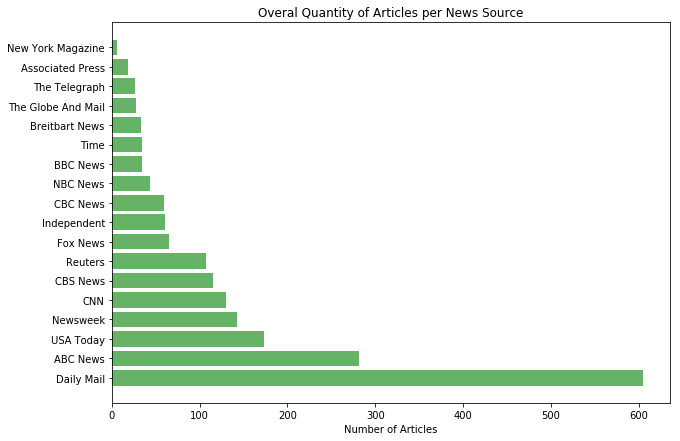

Based on the analysis of "Overal Quantity of Articles per News Source" chart, we can notice that Daily Mail published the maximum number of articles (605).
New York Magazine published the minimal quantity of articles (6) related to the given keywords.


In [36]:
bar_news(news_dat)

In [21]:
def compound_score_data(news_data):
    '''takes a DataFrame as an argument and calculates compound scores for articles description,
    returns a new DataFrame
    '''
    news_data_new=news_data.loc[:,['year_month', 'name', 'description']]
    for index, row in news_data_new.iterrows():
        text=news_data_new.loc[index,"description"]
        if text:
            results = analyzer.polarity_scores(text)
            news_data_new.loc[index,"score"]=round(results["compound"],2)
        else:
            news_data_new.drop(index, inplace=True)
    return(news_data_new)

In [22]:
compound_df=compound_score_data(news_dat)
compound_df.head(10)

,year_month,name,description,score
0,2018-06,Daily Mail,Access to the Greco-Roman ruins in the village...,-0.44
1,2018-06,Fox News,Fox News Tart Texas talker gets serious consid...,0.88
2,2018-06,Independent,Weather conditions create luminous plume effec...,-0.05
3,2018-06,Daily Mail,A ball-shaped artificial intelligence robot ni...,0.48
5,2018-06,Daily Mail,The rocket lifted off from Nasa's Kennedy Spa...,0.00
6,2018-06,Daily Mail,"SpaceX launches Falcon 9 rockets, the last of ...",0.42
7,2018-06,USA Today,SpaceX launched its Falcon 9 rocket and Dragon...,0.13
8,2018-06,Daily Mail,A former astronaut helped arrange the delivery...,0.38
9,2018-06,Daily Mail,A ball-shaped artificial intelligence robot ni...,0.48
10,2018-06,USA Today,"Here's the latest for Friday, June 29th: Man c...",-0.20


In [23]:
def compound_scores_heat_map(news_data_new):
    '''takes a DataFrame with compound scores as an argument,
    creates a heatmap chart for average compound scores.
    Since some news sources didn't publish articles on particular months,
    using pd.pivot_table gives us a 2D Series where missing values are replaced with NaN.
    '''
    c_matrix = pd.pivot_table(news_data_new, "score", index=["name"], columns=["year_month"], aggfunc=np.mean)                          
    c_matrix=c_matrix.round(2)
    
    #create a heatmap chart of the average compound scores
    fig = plt.figure(figsize=(12,12))
    hm = sns.heatmap(c_matrix, cmap='RdYlGn', annot=True)
    hm.set_title("Heatmap of Avg. Compound Scores")
    plt.savefig("compound_scores_heat_map.png", dpi=100)
    plt.show()

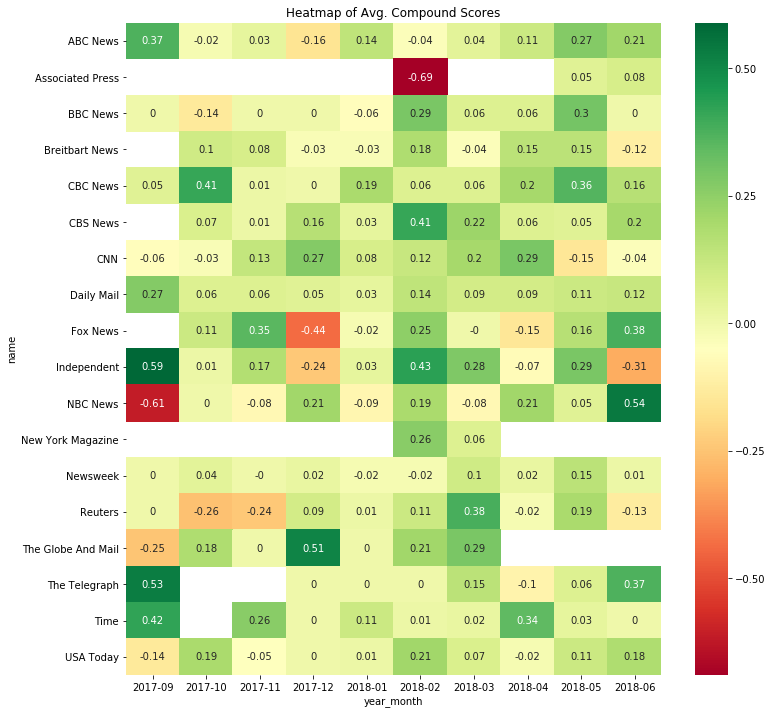

In [24]:
compound_scores_heat_map(compound_df)

In [25]:
def count_articles_heat_map(news_data): 
    '''takes a DataFrame as an argument,
    creates a heatmap chart "Number of Articles per Month"
    Since some news sources didn't publish articles on particular months,
    using pd.pivot_table gives us a 2D Series where missing values are replaced with NaN.
    '''
    d_matrix = pd.pivot_table(news_data, "url", index=["name"], columns=["year_month"], aggfunc='count')                          
    d_matrix.head(20)
    fig = plt.figure(figsize=(12,12))
    cm = sns.heatmap(d_matrix, cmap='YlGnBu', annot=True, fmt='g')
    cm.set_title("Number of Articles per Month")
    plt.savefig("count_values_heat_map.png", dpi=100)
    plt.show()

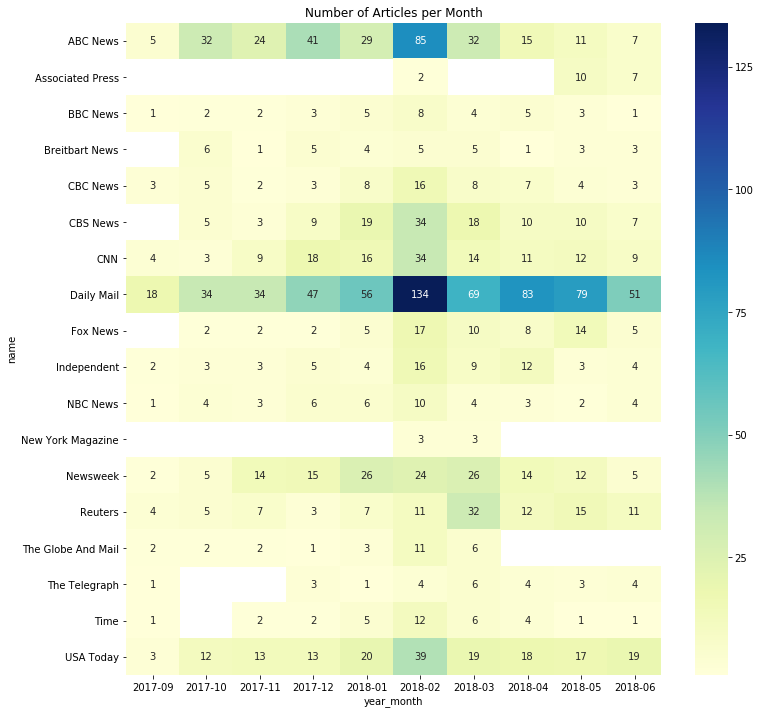

In [26]:
count_articles_heat_map(news_dat)